# Feature Creation - Sentimental Analysis

In [3]:
import datetime

import pandas as pd
import spacy
import re
import numpy as np
import string

from textblob import TextBlob
from textblob import Word

from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.sentiments import PatternAnalyzer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
# Download the reviews
# import nltk
# nltk.download('movie_reviews')

In [5]:
df = pd.read_csv("..//data//Womens Clothing E-Commerce Reviews PreProcessed.csv")

In [6]:
pd.set_option('max_colwidth', 50)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,processed_Review_text
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky sexy comfortable
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love dress sooo pretty happen find store glad ...
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hope dress want work initially order peti...
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit fun flirty fabulous ti...
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flattering adjustable tie perfect length...


In [7]:
df['processed_Review_text'].head(35).tail(5).tolist()

['beautifully pant trend flared crop cuter person love',
 'give pant second look online person cute stripe bright fit flattering crop cute flare right trend brand run small carry chubbiness belly pair collarless loose navy blazer',
 'pant well person downside need dry clean',
 'order month ago finally come order huge disappointment fit issue quality wool subpar mention felt wool guess literally feel like feel super thin itchy drape feel cheap china get sale worth pay definitely go',
 'neat dress color great fabric super soft tall long length add bonus definitely need underneath gap go pair funky tank necklace boot super cute']

In [8]:
df['Review Text'].head(35).tail(5).tolist()

['Beautifully made pants and on trend with the flared crop. so much cuter in person. love these!',
 "I never would have given these pants a second look online, in person they are much cuter! the stripes are brighter and the fit more flattering. the crop has a cute flare which is right on trend. this brand has always run small for me, i am 5'8 about 140lbs and carry some chubbiness in the belly. i paired it with a collarless loose navy blazer",
 'These pants are even better in person. the only downside is that they need to be dry cleaned.',
 'I ordered this 3 months ago, and it finally came off back order. a huge disappointment. the fit wasn\'t so much the issue for me. the quality of the wool is subpar. someone else mentioned a "felted wool"...i guess, is that what you call it?  it does literally feel like felt! super thin, itchy, doesn\'t drape very well, and feels cheap (made in china). i got it on sale, but still not worth what i paid. definitely going back.',
 'This is such a neat 

## Senitmental Analysis with NaiveBayes and Pattern Analyzer

In [9]:
patb = Blobber(analyzer=PatternAnalyzer())
nbtb = Blobber(analyzer=NaiveBayesAnalyzer())

def NaiveBayesAnalyzerResult(Text):
    # Returns a positive range between [0, 1], Negative can be computer by 1-positive
    return nbtb(Text).sentiment.p_pos

def PatternAnalyzerResult(Text):
    # Returns a polarity range between [-1, 1], if polarity is tends to -1 then negative, if it is tends to 1 then it is positive
    return patb(Text).sentiment[0]

def PatternAnalyzersubjectivityResult(Text):
    # Returns a subjectivity that range between [0, 1], if subjectivity is tends to 0 then objective, if it is tends to 1 then it is subjective
    return patb(Text).sentiment[1]

In [10]:
df['processed_Review_text'][df['processed_Review_text'].isna()]=""
df['processed_Review_text'][df['processed_Review_text'].isnull()]=""

C:\Users\bsubramani\AppData\Local\Continuum\anaconda2\envs\snakes\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\bsubramani\AppData\Local\Continuum\anaconda2\envs\snakes\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [11]:
df["PA_Polarity"]=df['processed_Review_text'].apply(PatternAnalyzerResult)
df["PA_Subjectivity"]=df['processed_Review_text'].apply(PatternAnalyzersubjectivityResult)
df["NB_Positive"]=df['processed_Review_text'].apply(NaiveBayesAnalyzerResult)

In [13]:
pd.set_option('max_colwidth', 1000)
df[["Rating","Review Text",'processed_Review_text',"PA_Polarity", "NB_Positive"]][df["PA_Polarity"]<-0.5].head(5)
# pd.set_option('max_colwidth', 50)

,Rating,Review Text,processed_Review_text,PA_Polarity,NB_Positive
2258,3,Hangs terribly off the chest. tent-like. looks maternity. no thanks.,hang terribly chest tent like look maternity thank,-1.00000,0.749006
5114,1,"What a disappointment and for the price, it's outrageous!",disappointment price outrageous,-0.80000,0.437176
6296,2,"Awful color, horribly wrinkled and just a mess...so disappointed",awful color horribly wrinkle mess disappointed,-0.73125,0.028541
6315,2,"I found this piece very boxy and not very feminine. i tried to make it work but i just wasn't feeling it the material is thin and the design is boring. unfort, it wasn't for me.",find piece boxy feminine try work feel material thin design boring unfort,-0.70000,0.266129
9262,1,"I read all the reviews about the fabric being see through, but liked the dress enough to give it a shot. it is soooo see through. this trally could only be worn on a beach. very disappointed.",read review fabric like dress shot soooo trally wear beach disappointed,-0.75000,0.962904


In [14]:
df["NB_Result"]="pos"
df["NB_Result"][df[ "NB_Positive"]<=.5]="neg"


df["PA_Result"]="pos"
df["PA_Result"][df[ "PA_Polarity"]<=0]="neg"

C:\Users\bsubramani\AppData\Local\Continuum\anaconda2\envs\snakes\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\bsubramani\AppData\Local\Continuum\anaconda2\envs\snakes\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### Comparision between NaiveBayes result with Pattern Analyzer result.

In [15]:
accuracy_score(df["NB_Result"], df["PA_Result"])*100

80.94183769053905

### Pattern Analyzer result

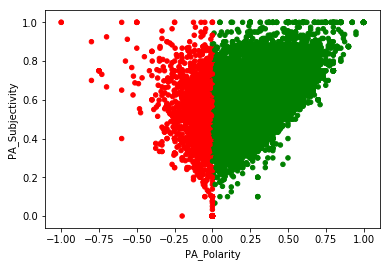

In [16]:
df[[ "PA_Polarity","PA_Subjectivity"]].plot.scatter(x='PA_Polarity',y='PA_Subjectivity', c=list(map(lambda x : "green" if x=="pos" else "red" , df["PA_Result"])));

### Pattern Analyzer result with Recommended IND (differentiated with colors)

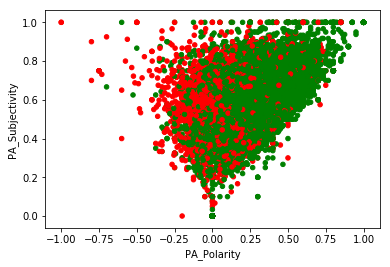

In [17]:
df[[ "PA_Polarity","PA_Subjectivity", "Recommended IND"]].plot.scatter(x='PA_Polarity',y='PA_Subjectivity', c=list(map(lambda x : "green" if x==1 else "red" , df["Recommended IND"])));

### Correlation

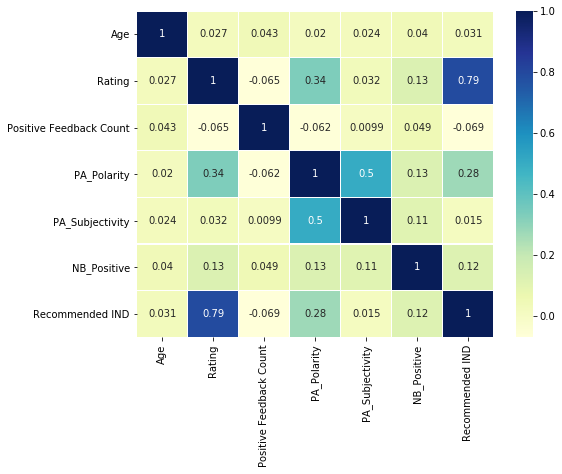

In [18]:
['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'processed_Review_text', 'PA_Polarity',
       'PA_Subjectivity']

## Checking the independence between the X features

ncols=['Age', 'Rating', 'Positive Feedback Count', 'PA_Polarity','PA_Subjectivity', "NB_Positive", 'Recommended IND']
cm = np.corrcoef(df[ncols].values.T) 
f, ax = plt.subplots(figsize =(8, 6)) 
sns.heatmap(cm, ax = ax, cmap ="YlGnBu",annot=True,linewidths = 0.1, yticklabels = ncols,xticklabels = ncols) 

- Good Relations between Rating & Recommendation 
- Relations between PA_Polarity & Recommendation
- No Relations between NaiveBayes Feature

Hence removing NaiveBayes sentimental values and proceeding our project with the help of Pattern Polarity and Subjectivity.

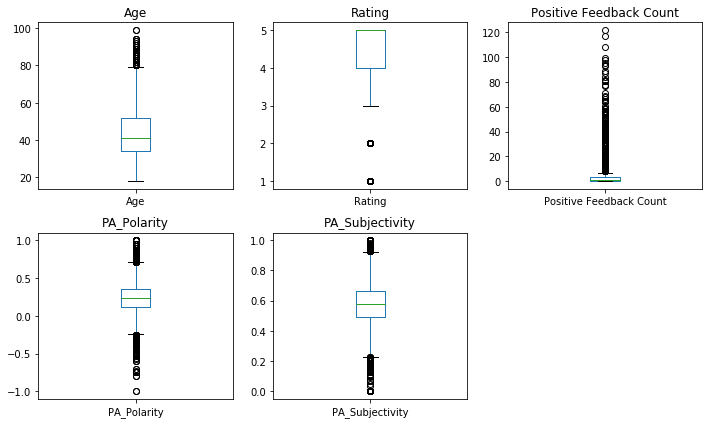

In [19]:
plt.subplots(figsize=(10,6))
i=1
for cs in ['Age', 'Rating', 'Positive Feedback Count', 'PA_Polarity','PA_Subjectivity']:
    plt.subplot(2,3,i)
    df[cs].plot(kind="box")
    plt.title(cs)
    i+=1
plt.tight_layout()

In [20]:
df[['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating','Recommended IND', 'Positive Feedback Count', 'Division Name',       'Department Name', 'Class Name', 'processed_Review_text', 'PA_Polarity',       'PA_Subjectivity']].to_csv("..//data//Womens Clothing E-Commerce Reviews Sentiment v2.csv", index=False)